In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pickle
from sklearn.metrics import mean_squared_error

In [2]:
#data = pd.read_csv(r"E:\CDAC\Project\Pune.csv")
from google.colab import drive
drive.mount('/content/drive')
# Load the file from Google Drive
data = pd.read_csv("/content/drive/MyDrive/Datasets - Colab/Pune.csv")

Mounted at /content/drive


In [3]:
#checking columns
data.columns

Index(['Date', 'T2M'], dtype='object')

In [4]:
data.head(20)

,Date,T2M
0,2004010105,15.16
1,2004010106,14.92
2,2004010107,16.80
3,2004010108,20.33
4,2004010109,24.30
5,2004010110,26.87
6,2004010111,28.16
7,2004010112,29.01
8,2004010113,29.35
9,2004010114,29.14


In [5]:
#Dropping the first 19 rows from the main DataFrame as it is incomplete for that particular day
data=data.iloc[19:]

In [6]:
data.head()

,Date,T2M
19,2004010200,13.28
20,2004010201,12.80
21,2004010202,12.32
22,2004010203,11.85
23,2004010204,11.42


In [7]:
data.tail()

,Date,T2M
175315,2019010100,12.52
175316,2019010101,11.83
175317,2019010102,11.27
175318,2019010103,10.89
175319,2019010104,10.62


In [8]:
# Drop the last 5 rows from the main DataFrame as it is incomplete for that particular day
data = data.iloc[:-5]

In [9]:
data.tail()

,Date,T2M
175310,2018123119,18.61
175311,2018123120,17.11
175312,2018123121,15.59
175313,2018123122,14.35
175314,2018123123,13.36


In [10]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')

# print the resulting DataFrame
print(data)

                      Date    T2M
19     2004-01-02 00:00:00  13.28
20     2004-01-02 01:00:00  12.80
21     2004-01-02 02:00:00  12.32
22     2004-01-02 03:00:00  11.85
23     2004-01-02 04:00:00  11.42
...                    ...    ...
175310 2018-12-31 19:00:00  18.61
175311 2018-12-31 20:00:00  17.11
175312 2018-12-31 21:00:00  15.59
175313 2018-12-31 22:00:00  14.35
175314 2018-12-31 23:00:00  13.36

[175296 rows x 2 columns]


In [11]:
data.index = data['Date']

In [12]:
data.head()

,Date,T2M
Date,,
2004-01-02 00:00:00,2004-01-02 00:00:00,13.28
2004-01-02 01:00:00,2004-01-02 01:00:00,12.80
2004-01-02 02:00:00,2004-01-02 02:00:00,12.32
2004-01-02 03:00:00,2004-01-02 03:00:00,11.85
2004-01-02 04:00:00,2004-01-02 04:00:00,11.42


In [13]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [14]:
data.count()

Date    175296
TEMP    175296
dtype: int64

In [15]:
# Splitting data into train and test sets
train_data = data[:-96]  # Use all data except the last 48 hours for training
test_data = data[-96:]   # Use the last 48 hours for testing

In [18]:
# SARIMA model parameters
order = (1, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 24)  # SARIMA parameters (P, D, Q, S)

In [19]:
check=train_data[:8760] #1 year data
test=train_data[8760:8808] #2 days = 48 hours

In [20]:
# Fit SARIMA model
pune_model = SARIMAX(check["TEMP"], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, dates=check["Date"])
pune_result = pune_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [21]:
# Forecast temperatures for the next 48 hours
forecast = pune_result.get_forecast(steps=48)

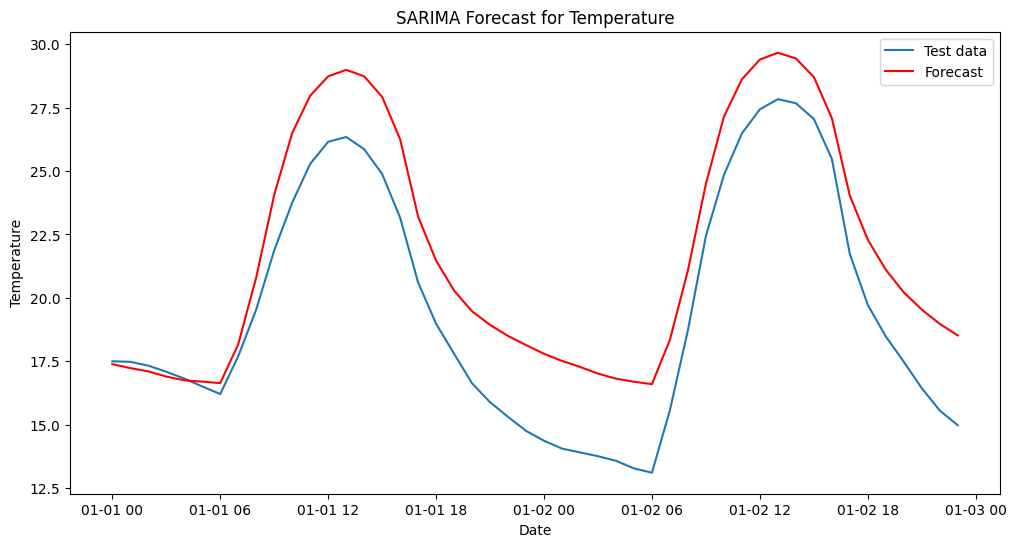

In [22]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test.index, test["TEMP"], label='Test data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [23]:
rmse = np.sqrt(mean_squared_error(test["TEMP"], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 2.5143984615509867


In [24]:
#saving pickle file of model
with open("/content/drive/MyDrive/Datasets - Colab/pune_model.pkl", 'wb') as f:
    pickle.dump(pune_result, f)

In [ ]:
# Load the saved SARIMA model from the file
with open("/content/drive/MyDrive/Datasets - Colab/sarima_model.pkl", 'rb') as f:
    sarima_result = pickle.load(f)

In [25]:
table=[8760*x for x in range(1, 21)]
table

[8760,
 17520,
 26280,
 35040,
 43800,
 52560,
 61320,
 70080,
 78840,
 87600,
 96360,
 105120,
 113880,
 122640,
 131400,
 140160,
 148920,
 157680,
 166440,
 175200]

In [28]:
i=2
check2=train_data[table[i-2]:table[i-1]]
test2=train_data[table[i-1]:table[i-1]+48] #2 days = 48 hours
print("training now: ", i)

training now:  2


In [29]:
pune_result=pune_result.extend(check2["TEMP"])

In [31]:
with open("/content/drive/MyDrive/Datasets - Colab/pune_model.pkl", 'wb') as f:
    pickle.dump(pune_result, f)

In [33]:
# Forecast temperatures for the next 48 hours
forecast2 = pune_result.get_forecast(steps=48)

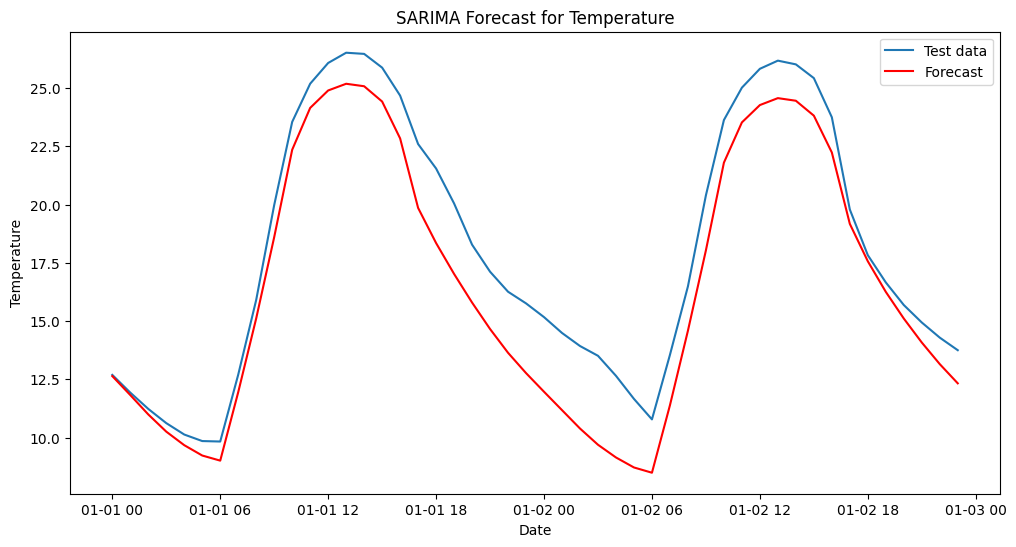

In [35]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test2.index, test2["TEMP"], label='Test data')
plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [36]:
rmse = np.sqrt(mean_squared_error(test2["TEMP"], forecast2.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 1.9576541615346186
